# Realtime Face Recognition And Attendance Management system

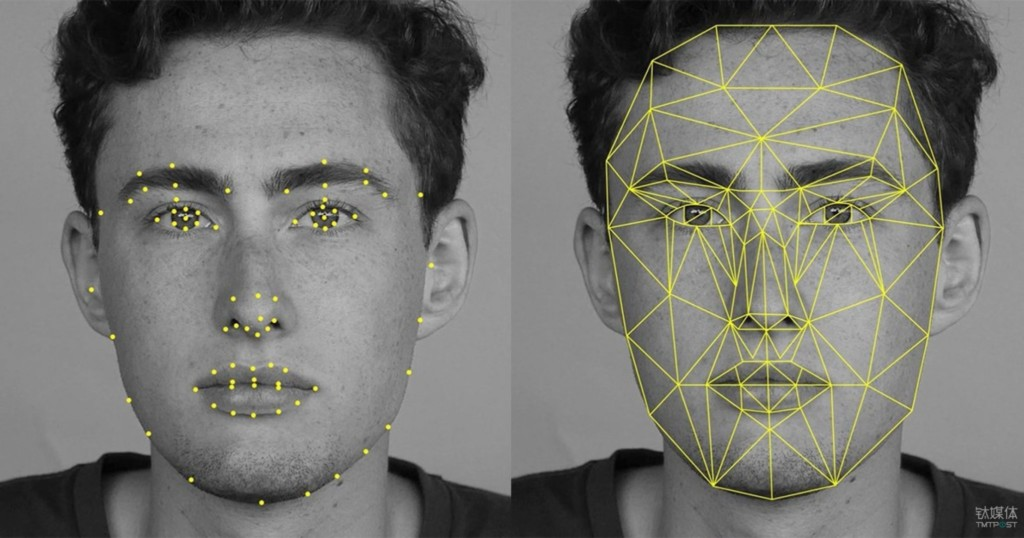

In [23]:
from IPython.display import Image
Image(filename="face_1.JPG", width=1080, height=160)

1. You need to install all requiered librarys.
2. Install visual studio and select pacakage dektop c++ compilation for c++ code compilation.
3. Try to run the code in anaconda or jupyternotebook or spider.
4. You can find image in training set image folder.
5. find your Attendance in Attendance.CSV file

# Important librarys

# 1. Dlib

DLib is an open source C++ library implementing a variety of machine learning algorithms, including classification, regression, clustering, data transformation, and structured prediction.

# 2. Face Recognition

Recognize and manipulate faces from Python or from the command line with the world's simplest face recognition library.

In [4]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install face-recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached face_recognition_models-0.3.0.tar.gz (100.1 MB)
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=d771125be8e2acae4894a53dab08c5f3429f5a1a34e45af6729851942055643c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b4\4b\8f\751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Note: you may need to restart the kernel to use updated packages.Successfully built face-recognition-models



In [1]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

In [2]:
# from PIL import ImageGrab

path = 'Training_images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)


['charles1.JPG', 'charls Modi.JPG', 'charls.JPG', 'Krish Naik.jpg', 'Sudhanshu.jpg']
['charles1', 'charls Modi', 'charls', 'Krish Naik', 'Sudhanshu']


In [3]:
def findEncodings(images):
    encodeList = []


    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [4]:
def markAttendance(name):
    with open('Attendance.csv', 'r+') as f:
        myDataList = f.readlines()


        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
            if name not in nameList:
                now = datetime.now()
                dtString = now.strftime('%H:%M:%S')
                f.writelines(f'\n{name},{dtString}')

In [ ]:
#### FOR CAPTURING SCREEN RATHER THAN WEBCAM
# def captureScreen(bbox=(300,300,690+300,530+300)):
#     capScr = np.array(ImageGrab.grab(bbox))
#     capScr = cv2.cvtColor(capScr, cv2.COLOR_RGB2BGR)
#     return capScr

encodeListKnown = findEncodings(images)
print('Encoding Complete')

cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
# img = captureScreen()
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
# print(faceDis)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
# print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            markAttendance(name)

    cv2.imshow('Webcam', img)
    cv2.waitKey(1)

Encoding Complete


# Good Job